# **LENDING CLUB**

LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

Given the data on loans previously taken form LendingClub, the aim is to create a model that can predict wether or not a new borrower will pay back loan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [7]:
data_info = pd.read_csv('lending_club_info.csv')

In [8]:
data_info.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [9]:
data_info.set_index("LoanStatNew", inplace = True) 

In [10]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


# A. EXPLORATORY DATA ANANLYSIS

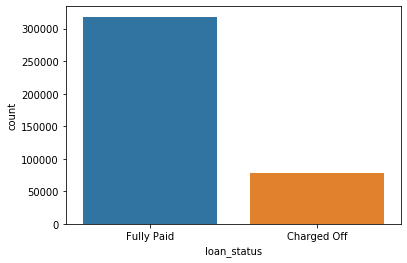

In [11]:
sns.countplot(data=df,x='loan_status')

### Hence the dataset is somewhat unbalanced

(array([2.7420e+03, 7.4500e+03, 1.0489e+04, 1.2791e+04, 2.0755e+04,
        2.2033e+04, 1.6495e+04, 2.1415e+04, 1.4714e+04, 3.7229e+04,
        1.2498e+04, 2.7261e+04, 9.8230e+03, 1.0588e+04, 2.6409e+04,
        1.4103e+04, 7.0870e+03, 1.3769e+04, 5.8370e+03, 2.2546e+04,
        8.0130e+03, 4.7010e+03, 3.7470e+03, 1.0780e+04, 1.1336e+04,
        2.2570e+03, 2.1860e+03, 6.9460e+03, 1.4940e+03, 8.0720e+03,
        8.9700e+02, 1.9290e+03, 1.2930e+03, 1.0300e+03, 1.5054e+04,
        5.0000e+01, 1.2000e+01, 8.0000e+00, 6.0000e+00, 1.8500e+02]),
 array([  500. ,  1487.5,  2475. ,  3462.5,  4450. ,  5437.5,  6425. ,
         7412.5,  8400. ,  9387.5, 10375. , 11362.5, 12350. , 13337.5,
        14325. , 15312.5, 16300. , 17287.5, 18275. , 19262.5, 20250. ,
        21237.5, 22225. , 23212.5, 24200. , 25187.5, 26175. , 27162.5,
        28150. , 29137.5, 30125. , 31112.5, 32100. , 33087.5, 34075. ,
        35062.5, 36050. , 37037.5, 38025. , 39012.5, 40000. ]),
 <a list of 40 Patch objects>)

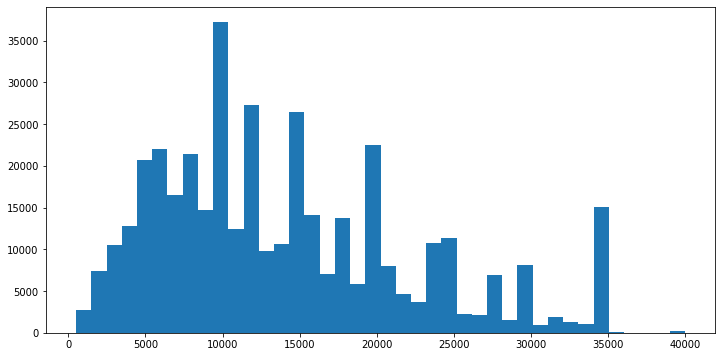

In [12]:
plt.figure(figsize=(12,6))
plt.hist(df['loan_amnt'],bins=40)

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

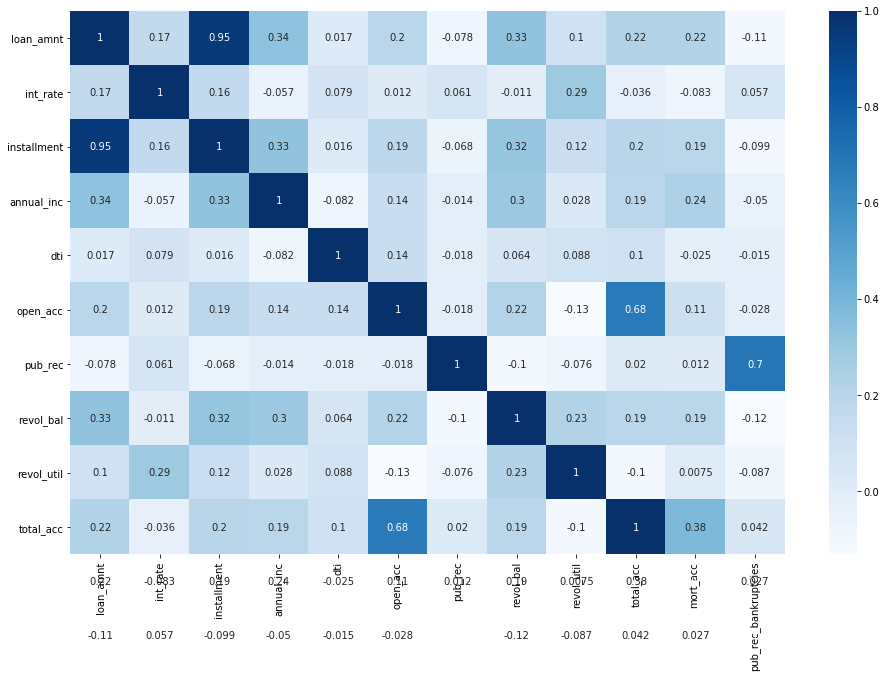

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.ylim(10,0)

### Installment is highly correlated with loan amount

In [23]:
df['installment'].describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

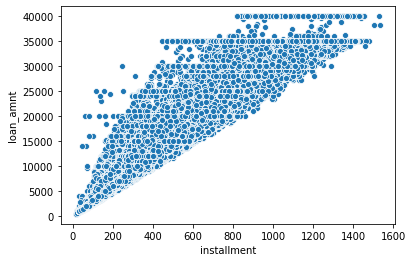

In [26]:
sns.scatterplot(x=df.installment,y=df.loan_amnt)

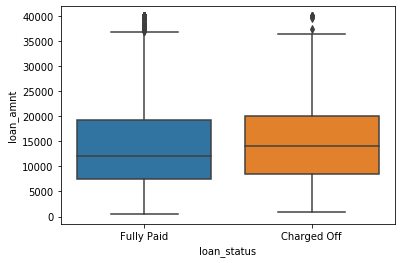

In [27]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

### Unpaid loans corresponds to slightly higher loan amount

In [28]:
sorted(df.grade.unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [40]:
sorted(df.sub_grade.unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

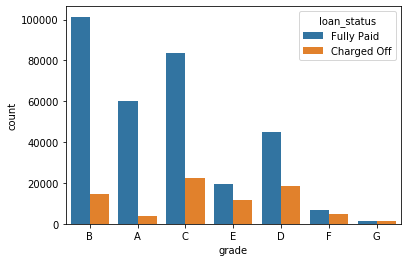

In [30]:
sns.countplot(data=df,x='grade',hue='loan_status')

### Grade and sub-grade represents quality of loans

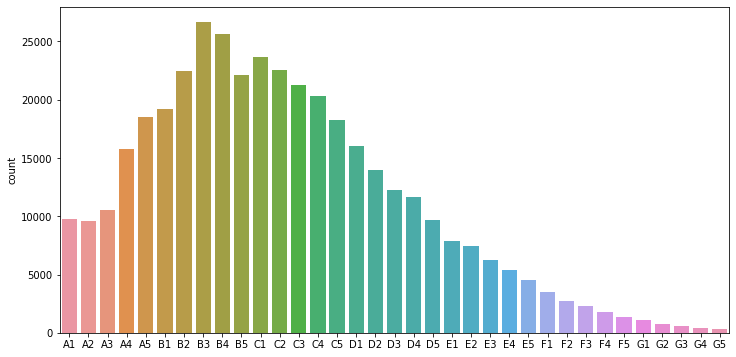

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x=sorted(df.sub_grade))

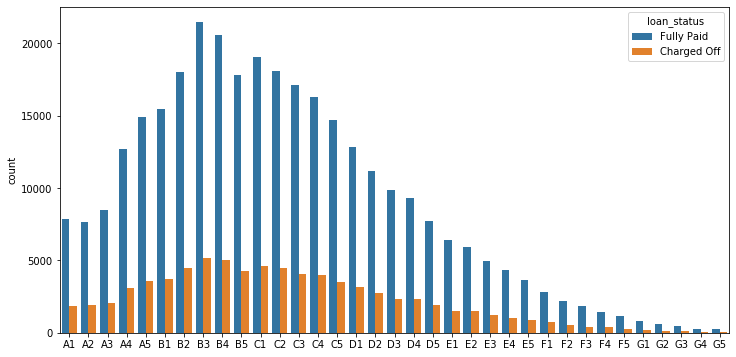

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x=sorted(df.sub_grade),hue='loan_status')

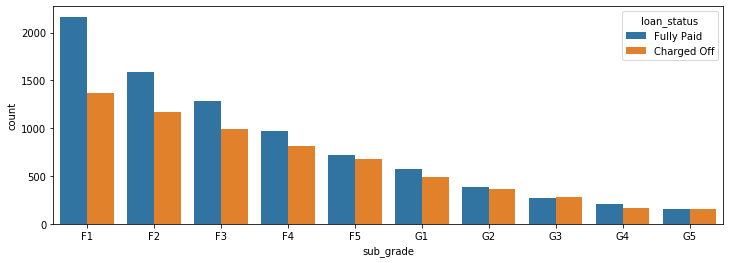

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x=df[(df['grade']=='F')|(df['grade']=='G')]['sub_grade'].sort_values(),hue='loan_status')

### The default rate is too high in F and G graded loans

## Converting loan_status into numerical data

In [36]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [37]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


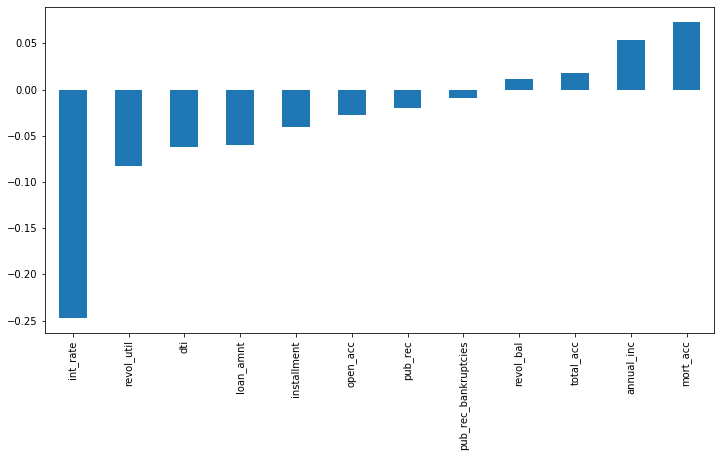

In [41]:
plt.figure(figsize=(12,6))
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

### So, higher the interest rate, more is the chance of default

# B. DATA PREPROCESSING

## 1. HANDLING MISSING DATA

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [43]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

### i. emp_title 

In [45]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [46]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [47]:
df['emp_title'].nunique()

173105

In [48]:
df['emp_title'].value_counts()

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                            ... 
Clinical Project Manager       1
Compliance Analyst             1
Lean Six Sigma Advisor         1
Telecom Engineer Advisor       1
director social services       1
Name: emp_title, Length: 173105, dtype: int64

### Number of unique job titles is too large to to convert into dummy variable feature. It is better to drop emp_title column

In [49]:
df=df.drop('emp_title',axis=1)

### ii. emp_length

In [50]:
df['emp_length'].sort_values().unique()

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', nan],
      dtype=object)

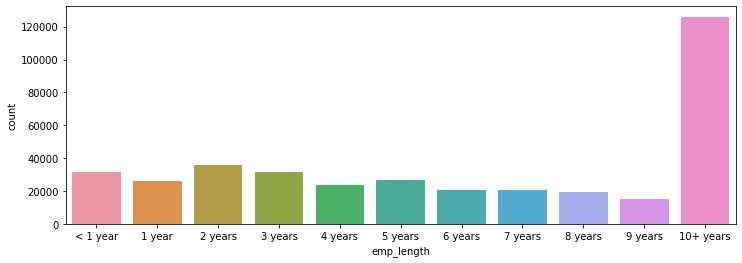

In [51]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['emp_length'].sort_values(),data=df,order=['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'])

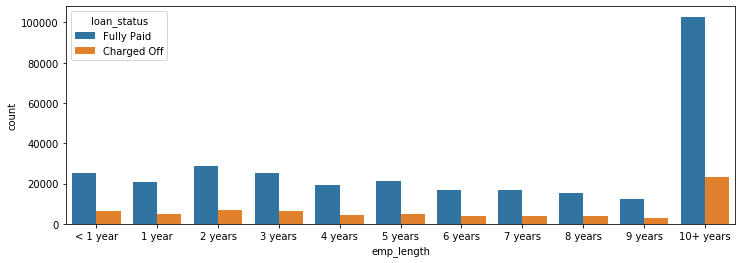

In [52]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['emp_length'].sort_values(),data=df,hue='loan_status',order=['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'])

### Calculating percentage of charged off loans per emp_length category

In [53]:
df.groupby('emp_length')['loan_repaid'].value_counts()[:,0]/df.groupby('emp_length')['loan_repaid'].value_counts()[:,1]

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_repaid, dtype: float64

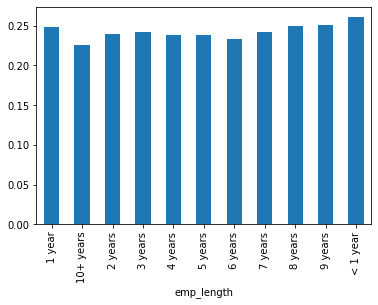

In [54]:
(df.groupby('emp_length')['loan_repaid'].value_counts()[:,0]/df.groupby('emp_length')['loan_repaid'].value_counts()[:,1]).plot(kind='bar')

### Since,percentage of charged off is too similar across all employment length categories, this feature will contribute too little in prediction. It is better to drop the column as compared to filling in the missing values

In [55]:
df = df.drop('emp_length',axis=1)

In [56]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

## iii. title column

In [57]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [58]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

### title column is further subcategorization of the purpose column, hence dropping it

In [59]:
df=df.drop('title',axis=1)

## iv. mort_acc feature

In [60]:
feat_info('mort_acc')

Number of mortgage accounts.


In [61]:
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [62]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

###  total_acc feature correlates with the mort_acc. Hence, grouping the dataframe by the total_acc and calculating the mean value for the mort_acc per total_acc entry

In [63]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

### Filling in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then using the mean value corresponding to its total_acc value

In [66]:
avg=df.groupby('total_acc')['mort_acc'].mean()

In [64]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return avg[total_acc]
    else:
        return mort_acc    

In [67]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [68]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

## v. revol_util

In [70]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [73]:
df['revol_util'].sort_values(ascending=False)

137211    892.3
329037    153.0
82600     152.5
65687     150.7
350333    148.0
          ...  
385222      NaN
388426      NaN
390665      NaN
395088      NaN
395665      NaN
Name: revol_util, Length: 396030, dtype: float64

In [75]:
df.corr()['revol_util'].sort_values()

open_acc               -0.131420
total_acc              -0.104273
pub_rec_bankruptcies   -0.086751
loan_repaid            -0.082373
pub_rec                -0.075910
mort_acc                0.005821
annual_inc              0.027871
dti                     0.088375
loan_amnt               0.099911
installment             0.123915
revol_bal               0.226346
int_rate                0.293659
revol_util              1.000000
Name: revol_util, dtype: float64

In [79]:
df.groupby('int_rate')['revol_util'].mean().sort_values()

int_rate
30.84     0.000000
17.54     6.400000
7.43      8.700000
10.14    10.828571
7.75     12.119048
           ...    
22.85    95.242857
20.40    95.400000
15.07    96.450000
24.40    98.600000
17.44    99.800000
Name: revol_util, Length: 566, dtype: float64

In [80]:
avg_revol=df.groupby('int_rate')['revol_util'].mean()

In [82]:
def fill_revol_util(int_rate,revol_util):
    if np.isnan(revol_util):
        return avg_revol[int_rate]
    else:
        return revol_util

In [83]:
df['revol_util']=df.apply(lambda x: fill_revol_util(x['int_rate'],x['revol_util']),axis=1)

##  vi. pub_rec_bankruptcies

In [95]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [97]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [98]:
df.corr()['pub_rec_bankruptcies'].sort_values()

revol_bal              -0.124532
loan_amnt              -0.106539
installment            -0.098628
revol_util             -0.086783
annual_inc             -0.050162
open_acc               -0.027732
dti                    -0.014558
loan_repaid            -0.009383
mort_acc                0.029276
total_acc               0.042035
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

### Its better to drop rows corresponding to missing pub_rec__bankruptcies

In [112]:
df=df.dropna()

In [113]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## 2. HANDLING CATEGORICAL DATA

In [114]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

## i. term

In [115]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395495, dtype: object

### Converting the term feature into either a 36 or 60 integer numeric data type

In [ ]:
df['term']=df['term'].apply(lambda x:int(x[1:3]))

In [118]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395495, dtype: int64

## ii. grade

### we will keep sub_grade feature and drop the grade feature since grade is part of sub_grade

In [119]:
df=df.drop('grade',axis=1)

## iii. sub_grade

### Converting the subgrade into dummy variables

In [120]:
dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

In [121]:
df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [122]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

## iv. verification_status, application_type,initial_list_status,purpose

### Converting these features into dummy variables

In [123]:
dummies2=pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [124]:
df=pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies2],axis=1)

In [125]:
df.select_dtypes('object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

## v. home_ownership

In [126]:
df['home_ownership'].value_counts()

MORTGAGE    198151
RENT        159508
OWN          37692
OTHER          112
NONE            29
ANY              3
Name: home_ownership, dtype: int64

### placing 'OTHER', 'NONE' AND 'ANY' in a single group 'OTHER'

In [137]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [138]:
df['home_ownership'].value_counts()

MORTGAGE    198151
RENT        159508
OWN          37692
OTHER          144
Name: home_ownership, dtype: int64

In [139]:
dummyhome=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dummyhome],axis=1)

## vi. address

In [140]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395495, dtype: object

### Creating a column called 'zip_code' that extracts the zip code from the address column

In [141]:
df['zip_code']=df['address'].apply(lambda x:x[-5:])

In [142]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395495, dtype: object

In [143]:
dummieszip = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop(['zip_code','address'],axis=1),dummieszip],axis=1)

## vii. issue_id

### we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so dropping this feature

In [144]:
df=df.drop('issue_d',axis=1)

## viii. earliest_cr_line

In [147]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [148]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395495, dtype: object

### extracting year

In [149]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [150]:
df=df.drop('earliest_cr_line',axis=1)  

In [151]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

## ix. loan_status

### we have already converted the information given by loan_status into loan_repaid column. Hence, dropping loan_status

In [152]:
df = df.drop('loan_status',axis=1)

## Now the dataset is ready for model

# C. CREATING MODEL

## Train-test split

In [153]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [154]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

## Normalizing the Data

In [157]:
from sklearn.preprocessing import MinMaxScaler

In [158]:
scaler=MinMaxScaler()

In [159]:
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Using Random Forest Model

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rfc=RandomForestClassifier(n_estimators=10)

In [162]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
y_rfc=rfc.predict(X_test)

In [165]:
from sklearn.metrics import confusion_matrix, classification_report

In [166]:
print(confusion_matrix(y_test,y_rfc))
print(classification_report(y_test,y_rfc))

[[ 8156  7468]
 [ 2163 61312]]
              precision    recall  f1-score   support

           0       0.79      0.52      0.63     15624
           1       0.89      0.97      0.93     63475

    accuracy                           0.88     79099
   macro avg       0.84      0.74      0.78     79099
weighted avg       0.87      0.88      0.87     79099



## f1-score suggests that our model is good at predicting repaid loan but not so good at defaults